In [2]:
import numpy as np
import pandas as pd


In [3]:
survey_raw= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Stackoverflow_developer_survey_analysis/stack-overflow-developer-survey-2021/survey_results_public.csv")

In [4]:
survey_raw.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [5]:
survey_raw.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [6]:
survey_raw.CompTotal

0          4800.0
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
83434    160500.0
83435    200000.0
83436      1800.0
83437     90000.0
83438      7700.0
Name: CompTotal, Length: 83439, dtype: float64

In [7]:
schema_file= "/content/drive/MyDrive/Colab_Notebooks/Stackoverflow_developer_survey_analysis/stack-overflow-developer-survey-2021/survey_results_schema.csv"

In [8]:
pd.read_csv(schema_file, index_col= 'qname').question

qname
S0                    <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                              Browser Meta Info
S1                    <span style="font-size:22px; font-family: aria...
MainBranch            Which of the following options best describes ...
Employment            Which of the following best describes your cur...
Country               Where do you live? <span style="font-weight: b...
US_State              <p>In which state or territory of the USA do y...
UK_Country            In which part of the United Kingdom do you liv...
S2                    <span style="font-size:22px; font-family: aria...
EdLevel               Which of the following best describes the high...
Age1stCode            At what age did you write your first line of c...
LearnCode             How did you learn to code? Select all that apply.
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many ye

In [9]:
schema_raw= pd.read_csv(schema_file, index_col= 'qname').question

In [10]:
schema_raw

qname
S0                    <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                              Browser Meta Info
S1                    <span style="font-size:22px; font-family: aria...
MainBranch            Which of the following options best describes ...
Employment            Which of the following best describes your cur...
Country               Where do you live? <span style="font-weight: b...
US_State              <p>In which state or territory of the USA do y...
UK_Country            In which part of the United Kingdom do you liv...
S2                    <span style="font-size:22px; font-family: aria...
EdLevel               Which of the following best describes the high...
Age1stCode            At what age did you write your first line of c...
LearnCode             How did you learn to code? Select all that apply.
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many ye

In [11]:
schema_raw['SOVisitFreq']

'How frequently would you say you visit Stack Overflow?'

We've now loaded the dataset, and we're ready to move on to the next step of pre-processing and cleaning data for our analysis.

##Data Preparation & Cleaning
###While the survey responses contain a wealth of information, we'll limit our analysis to some areas:

###  • Demographics of the survey respondents & global programming community
###  • Distribution of programming skills, experince and preferences
###  • Employment-related information, preferences & opinions

In [12]:
selected_columns_survey= [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',


    #Programming and Experience
    'Age1stCode',
    'LearnCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith',

    #Employment
    'Employment',
    'DevType',
    'NEWStuck',
    'MainBranch',

    #StackOverflow and Related
    'SOVisitFreq',
    'SOAccount',
    'SOPartFreq'
]

In [13]:
selected_columns_schema= [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',


    #Programming and Experience
    'Age1stCode',
    'LearnCode',
    'YearsCode',
    'YearsCodePro',
    'Language',
    'ToolsTech',

    #Employment
    'Employment',
    'DevType',
    'NEWStuck',
    'MainBranch',

    #StackOverflow and Related
    'SOVisitFreq',
    'SOAccount',
    'SOPartFreq'
]

In [14]:
len(selected_columns_survey)

19

In [15]:
len(selected_columns_schema)

17

Let's extract a copy of the data from these columns into a new dataframe df, which we can continue to modify furher without affecting the original df.

In [16]:
survey_df= survey_raw[selected_columns_survey].copy()

In [17]:
schema_df= schema_raw[selected_columns_schema]

In [18]:
survey_df

,Country,Age,Gender,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,Employment,DevType,NEWStuck,MainBranch,SOVisitFreq,SOAccount,SOPartFreq
0,Slovakia,25-34 years old,Man,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, mobile",Call a coworker or friend;Visit Stack Overflow...,I am a developer by profession,Multiple times per day,Yes,A few times per month or weekly
1,Netherlands,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,JavaScript;Python,NaN,Docker;Git;Yarn,Git,"Student, full-time",NaN,Visit Stack Overflow;Google it,I am a student who is learning to code,Daily or almost daily,Yes,Daily or almost daily
2,Russian Federation,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,NaN,NaN,"Student, full-time",NaN,Visit Stack Overflow;Google it;Watch help / tu...,"I am not primarily a developer, but I write co...",Multiple times per day,Yes,Multiple times per day
3,Austria,35-44 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,Employed full-time,"Developer, front-end",Call a coworker or friend;Visit Stack Overflow...,I am a developer by profession,Daily or almost daily,Yes,Daily or almost daily
4,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Docker;Git;Kubernetes;Yarn,Docker;Git;Kubernetes;Yarn,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",Visit Stack Overflow;Go for a walk or other ph...,I am a developer by profession,Daily or almost daily,Yes,A few times per week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,United States of America,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,5,Clojure;Kotlin;SQL,Clojure,Docker;Git,Git;Kubernetes,Employed full-time,"Developer, back-end",Call a coworker or friend;Google it,I am a developer by profession,A few times per week,No,NaN
83435,Benin,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,2,NaN,NaN,Git;Unity 3D;Unreal Engine,Docker;Git;Kubernetes,"Independent contractor, freelancer, or self-em...","Developer, full-stack",Call a coworker or friend;Visit Stack Overflow...,I am a developer by profession,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...
83436,United States of America,25-34 years old,Man,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,4,Groovy;Java;Python,Java;Python,Ansible;Docker;Git;Terraform,Docker;Git;Kubernetes;Terraform,Employed full-time,Data scientist or machine learning specialist;...,Call a coworker or friend;Visit Stack Overflow...,I am a developer by profession,A few times per week,Yes,I have never participated in Q&A on Stack Over...
83437,Canada,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,3,Bash/Shell;JavaScript;Node.js;Python,Go;Rust,Ansible;Docker;Git;Terraform,Kubernetes;Terraform,Employed full-time,"Developer, back-end",Call a coworker or friend;Visit Stack Overflow...,I am a developer by profession,A few times per month or weekly,Yes,Less than once per month or monthly


In [19]:
survey_df.shape

(83439, 19)

In [20]:
schema_df

qname
Country         Where do you live? <span style="font-weight: b...
Age                                             What is your age?
Gender          Which of the following describe you, if any? P...
EdLevel         Which of the following best describes the high...
Age1stCode      At what age did you write your first line of c...
LearnCode       How did you learn to code? Select all that apply.
YearsCode       Including any education, how many years have y...
YearsCodePro    NOT including education, how many years have y...
Language        Which <b>programming, scripting, and markup la...
ToolsTech       Which <strong>tools</strong> have you done ext...
Employment      Which of the following best describes your cur...
DevType         Which of the following describes your current ...
NEWStuck        What do you do when you get stuck on a problem...
MainBranch      Which of the following options best describes ...
SOVisitFreq     How frequently would you say you visit Stack O...
SOAc

In [21]:
schema_df.shape

(17,)

In [22]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  83439 non-null  object
 1   Age                      82407 non-null  object
 2   Gender                   82286 non-null  object
 3   EdLevel                  83126 non-null  object
 4   Age1stCode               83243 non-null  object
 5   LearnCode                82963 non-null  object
 6   YearsCode                81641 non-null  object
 7   YearsCodePro             61216 non-null  object
 8   LanguageHaveWorkedWith   82357 non-null  object
 9   LanguageWantToWorkWith   76821 non-null  object
 10  ToolsTechHaveWorkedWith  72537 non-null  object
 11  ToolsTechWantToWorkWith  65480 non-null  object
 12  Employment               83323 non-null  object
 13  DevType                  66484 non-null  object
 14  NEWStuck                 83052 non-nul

In [23]:
schema_df.info()

<class 'pandas.core.series.Series'>
Index: 17 entries, Country to SOPartFreq
Series name: question
Non-Null Count  Dtype 
--------------  ----- 
17 non-null     object
dtypes: object(1)
memory usage: 828.0+ bytes


In [24]:
survey_df["YearsCode"]= pd.to_numeric(survey_df.YearsCode, errors= 'coerce')
survey_df["YearsCodePro"]= pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')

In [25]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  83439 non-null  object 
 1   Age                      82407 non-null  object 
 2   Gender                   82286 non-null  object 
 3   EdLevel                  83126 non-null  object 
 4   Age1stCode               83243 non-null  object 
 5   LearnCode                82963 non-null  object 
 6   YearsCode                79982 non-null  float64
 7   YearsCodePro             58467 non-null  float64
 8   LanguageHaveWorkedWith   82357 non-null  object 
 9   LanguageWantToWorkWith   76821 non-null  object 
 10  ToolsTechHaveWorkedWith  72537 non-null  object 
 11  ToolsTechWantToWorkWith  65480 non-null  object 
 12  Employment               83323 non-null  object 
 13  DevType                  66484 non-null  object 
 14  NEWStuck              

In [26]:
survey_df.describe()

,YearsCode,YearsCodePro
count,79982.000000,58467.000000
mean,12.485722,9.572511
std,9.626184,8.123225
min,1.000000,1.000000
25%,5.000000,4.000000
50%,10.000000,7.000000
75%,17.000000,13.000000
max,50.000000,50.000000


In [27]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply.'

The gender column also allows picking multiple options, but to simplify our analysis we'll remove values containing more than one choice.

In [28]:
survey_df['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [29]:
survey_df.where(~(survey_df.Gender.str.contains(';', na= False)), np.nan, inplace= True)

In [30]:
survey_df['Gender'].value_counts()

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

Dataset seems to be cleaned enough for analysis. Let's take a sample view.

In [31]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,Employment,DevType,NEWStuck,MainBranch,SOVisitFreq,SOAccount,SOPartFreq
31940,Greece,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6.0,12.0,Dart;HTML/CSS;JavaScript;Node.js;Swift;TypeScript,Kotlin;Rust,Git,Docker;Unity 3D;Unreal Engine,Employed full-time,"Developer, mobile;Developer, front-end;Develop...",Visit Stack Overflow;Google it,I am a developer by profession,Daily or almost daily,Yes,A few times per month or weekly
29075,United States of America,25-34 years old,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,"Other online resources (ex: videos, blogs, etc...",12.0,7.0,Assembly;Bash/Shell;C;Perl;Python,Assembly;C;C++;Perl;Python;Rust,Ansible;Docker;Git,Ansible;Docker;Git,Employed full-time,Data scientist or machine learning specialist;...,Call a coworker or friend;Visit Stack Overflow...,I am a developer by profession,A few times per week,No,NaN
43104,Netherlands,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,School;Online Courses or Certification,4.0,NaN,C++;Dart;Java;JavaScript;Kotlin;Node.js;Python,Dart,Git;Unity 3D,Docker;Git;Unity 3D,"Student, full-time",NaN,Call a coworker or friend;Visit Stack Overflow...,I am a student who is learning to code,Daily or almost daily,Yes,I have never participated in Q&A on Stack Over...
43888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38164,India,Under 18 years old,Man,Primary/elementary school,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",1.0,NaN,APL;C,C++;HTML/CSS;Java;Python,NaN,NaN,I prefer not to say,NaN,Call a coworker or friend;Visit Stack Overflow...,I am a student who is learning to code,A few times per week,Yes,I have never participated in Q&A on Stack Over...
48067,Australia,25-34 years old,Man,Some college/university study without earning ...,11 - 17 years,Online Forum;Online Courses or Certification,3.0,NaN,Bash/Shell;C;HTML/CSS;JavaScript;Python,NaN,Unity 3D,NaN,Employed full-time,System administrator,Visit Stack Overflow;Google it;Watch help / tu...,I code primarily as a hobby,Less than once per month or monthly,Yes,Less than once per month or monthly
19451,India,35-44 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",35 - 44 years,Coding Bootcamp;School,7.0,5.0,Go;JavaScript;Node.js;Python;Rust;SQL,Rust;SQL;TypeScript,Docker,Docker;Kubernetes;Pulumi,Employed full-time,"Developer, full-stack",Visit Stack Overflow;Google it,I am a developer by profession,Daily or almost daily,Not sure/can't remember,NaN
38277,Netherlands,45-54 years old,Man,"Secondary school (e.g. American high school, G...",5 - 10 years,"Other online resources (ex: videos, blogs, etc...",35.0,20.0,Bash/Shell;Java,Elixir;Java,Ansible;Docker;Git,Ansible;Docker;Git;Kubernetes,Employed full-time,"Developer, back-end;Engineering manager",Call a coworker or friend;Visit Stack Overflow...,I am a developer by profession,A few times per week,Yes,Less than once per month or monthly
69781,Philippines,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp;School;Friend or family member...,11.0,7.0,Bash/Shell;C;C#;C++;Groovy;Java;JavaScript;Kot...,Bash/Shell;Groovy;Java;Kotlin;SQL,Docker;Git,Git,Employed full-time,"Developer, full-stack;Developer, back-end;Data...",Go for a walk or other physical activity;Do ot...,I am a developer by profession,A few times per month or weekly,Yes,Less than once per month or monthly
28804,United States of America,45-54 years old,Man,Some college/university study without earning ...,11 - 17 years,Books / Physical media,38.0,20.0,HTML/CSS;JavaScript;Node.js;PHP;Ruby;SQL,HTML/CSS;Ruby;SQL,Docker;Git,Docker;Git;Kubernetes;Unreal Engine,Employed full-time,"Developer, front-end

schema_df containing unnecessary html tags so we'll remove them using beautiful soup which is generally used for web_scraping.

In [32]:
from bs4 import BeautifulSoup


# Define a function to remove HTML tags
def remove_html_tags(text):
    if pd.notna(text):
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()
    else:
        return None


schema_df = schema_df.apply(remove_html_tags)

In [33]:
schema_df.head()

qname
Country                                    Where do you live? *
Age                                           What is your age?
Gender        Which of the following describe you, if any? P...
EdLevel       Which of the following best describes the high...
Age1stCode    At what age did you write your first line of c...
Name: question, dtype: object

##Exploratory Data Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

<h2> Country

In [35]:
schema_df.Country

'Where do you live? *'

In [36]:
survey_df.Country.nunique()

180

since there are a very large number of countries and they cannot be plotted on a single graph, so we'll be taking the top 15 countries.

In [37]:
top_15= survey_df.Country.value_counts().head(15)
top_15

United States of America                                15051
India                                                   10476
Germany                                                  5568
United Kingdom of Great Britain and Northern Ireland     4447
Canada                                                   2983
France                                                   2685
Brazil                                                   2232
Poland                                                   1785
Netherlands                                              1759
Italy                                                    1659
Australia                                                1627
Spain                                                    1472
Russian Federation                                       1462
Sweden                                                   1179
Turkey                                                   1050
Name: Country, dtype: int64

We can visualize the above data using a bar plot.


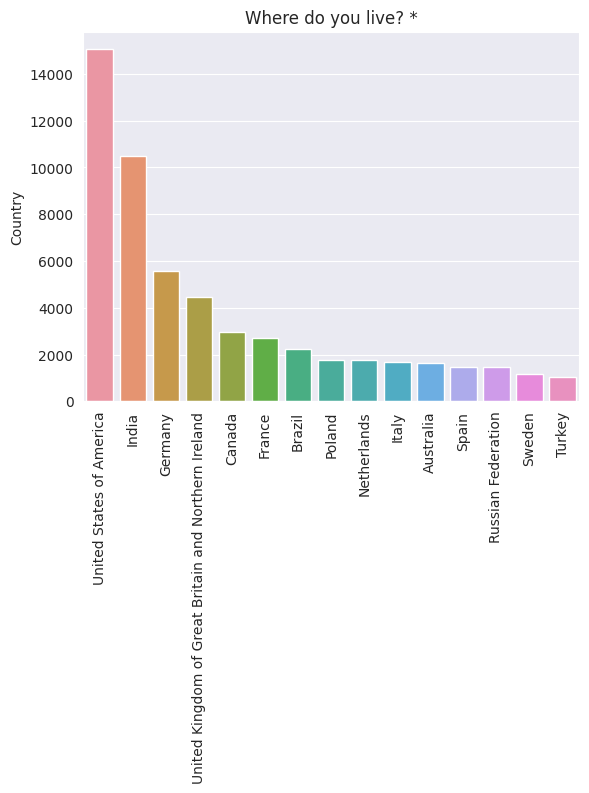

In [38]:
plt.xticks(rotation= 90)
plt.title(schema_df['Country'])
sns.barplot(x=top_15.index, y=top_15);

It appears that a high number of respondents are from USA and India - which one might expect since these countries have the highest populations (apart from China), and since the survey is in English, which is the common langauge used by professionals in USA, India & UK.

<h2> Age

In [39]:
schema_df.Age

'What is your age?'

In [40]:
survey_df['Age']

0        25-34 years old
1        18-24 years old
2        18-24 years old
3        35-44 years old
4        25-34 years old
              ...       
83434    25-34 years old
83435    18-24 years old
83436    25-34 years old
83437    25-34 years old
83438    18-24 years old
Name: Age, Length: 83439, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '25-34 years old'),
  Text(1, 0, '18-24 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, 'Prefer not to say'),
  Text(4, 0, '45-54 years old'),
  Text(5, 0, 'Under 18 years old'),
  Text(6, 0, '65 years or older'),
  Text(7, 0, '55-64 years old')])

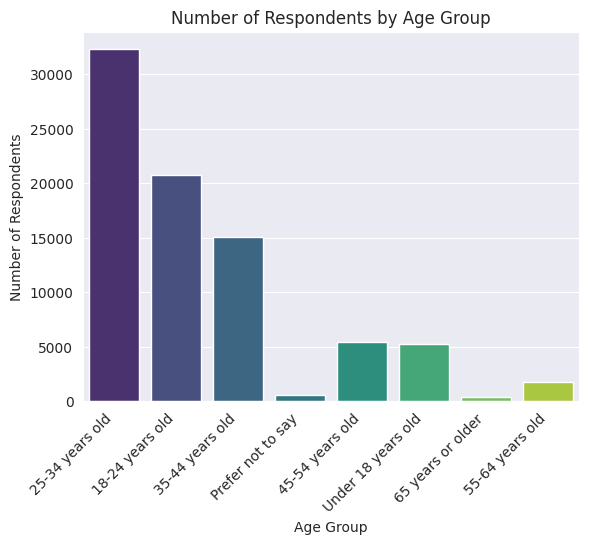

In [41]:
sns.countplot(x='Age', data=survey_df, palette='viridis')
plt.title('Number of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')



It appears that a large percentage of respondents are in the age range of 25-34, whihc clearly indicates most of them are working professionals of the programing community. And also most of the 25 - 34 year olds would like to discuss their problem or solve a solution in stackoverflow where the 18 - 24 years is the beginning of the programming age where they mostly prefer to ask their co-workers or other sources.

<h2> Gender

In [42]:
survey_df['Gender'].value_counts()

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

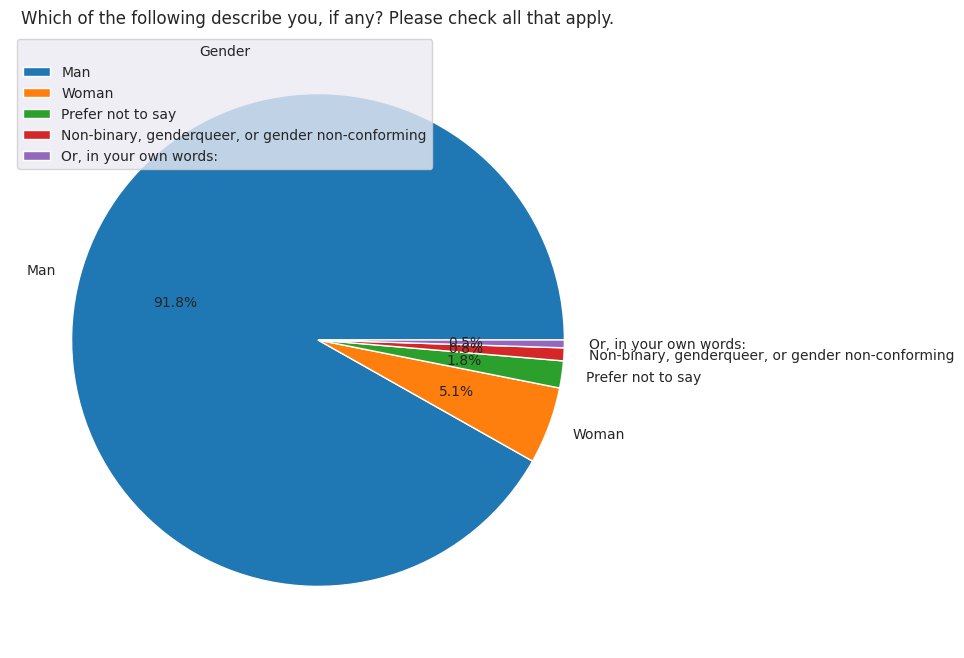

In [43]:
plt.figure(figsize= (10, 8))
plt.title(schema_df['Gender'])
plt.pie(survey_df['Gender'].value_counts(), labels= survey_df['Gender'].value_counts().index,
        autopct= '%1.1f%%', pctdistance=0.6)
plt.legend(survey_df['Gender'].value_counts().index, title='Gender', loc='best')

Only about 8% of survey respondents who have answered the question identify as women,non-binary, Prefer not to say or in your own words: . This number is lower than the ovreall percentage of women & others in the programing community - which is estimiated to be atleast around 15%.  

<h2> Education Level

In [44]:
schema_df["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [45]:
survey_df['EdLevel'].unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Professional degree (JD, MD, etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       nan], dtype=object)

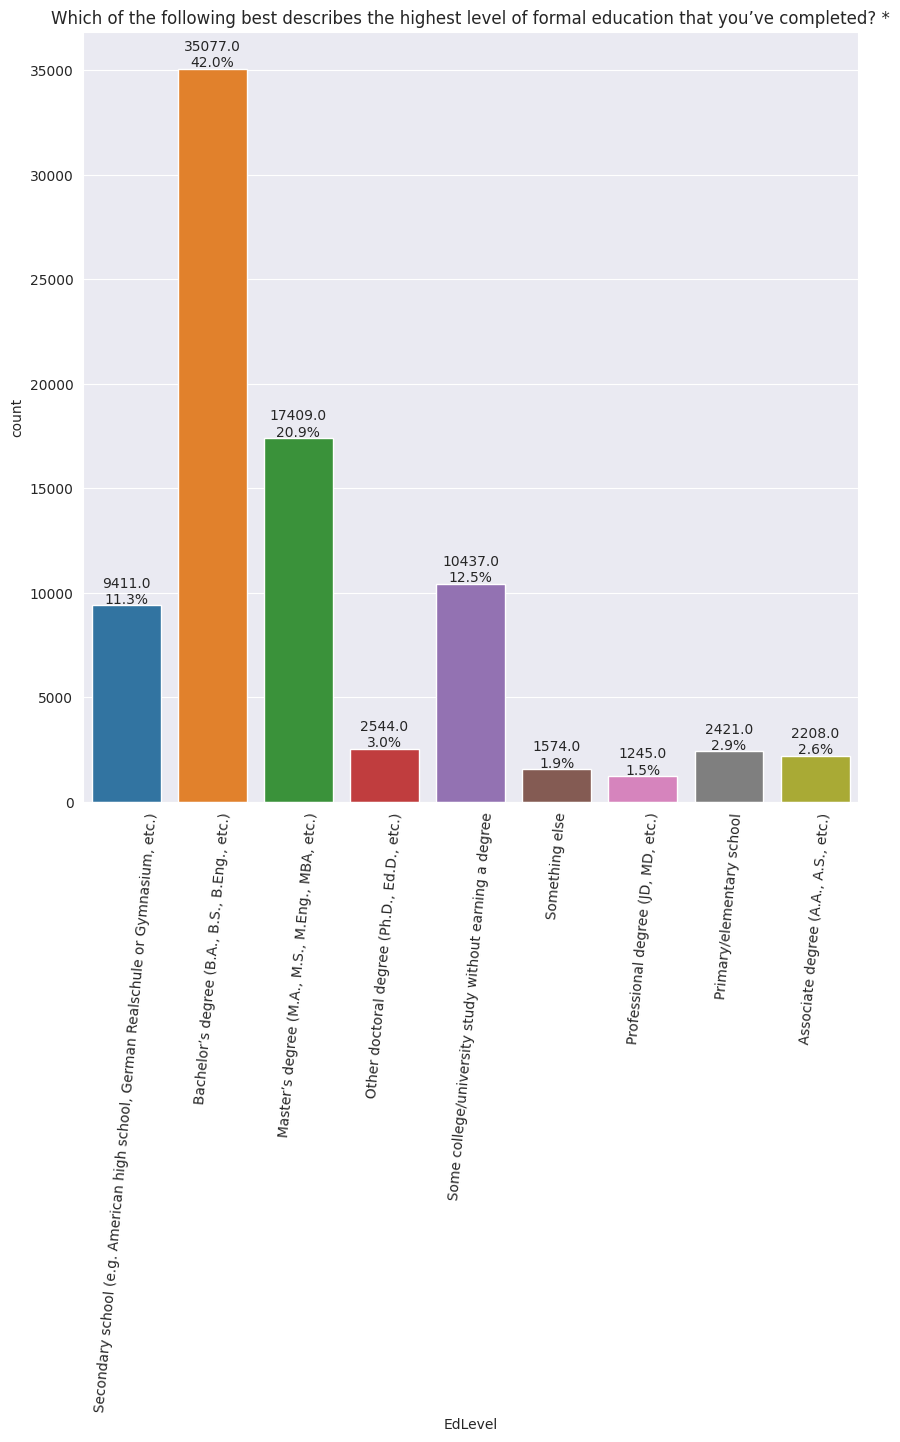

In [46]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x=survey_df["EdLevel"])

# Add counts and percentages on top of the bars
total = len(survey_df["EdLevel"])
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(f'{count}\n{percentage}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xticks(rotation=85)
plt.title(schema_df['EdLevel'])
plt.show()

It appears that more than half (~ 63%) of the respondents hold either a bachelor's or a master's degree, so most of the programmers definitely seem to have some college education, Though we cannot conclude that most of the programmers are from the Computer Science Background.

<h2> Employment

In [47]:
schema_df['Employment']

'Which of the following best describes your current employment status?'

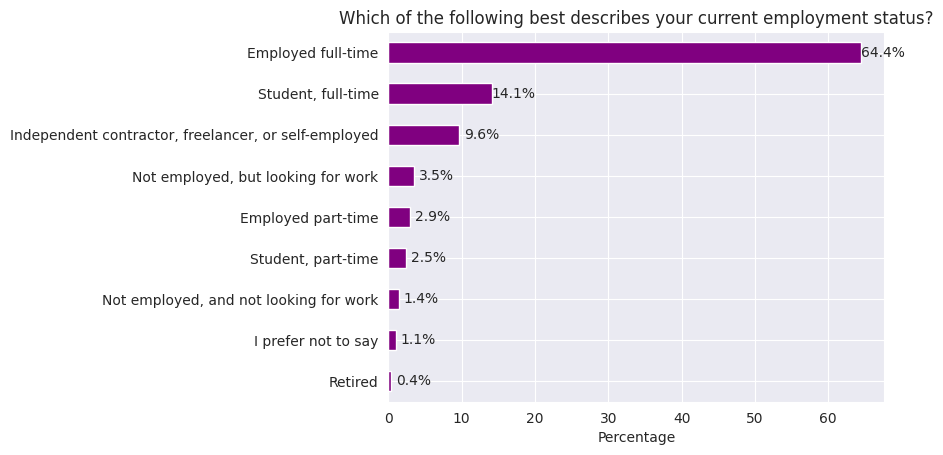

In [48]:
ax = (survey_df['Employment'].value_counts(normalize=True, ascending=True) * 100).plot(kind='barh', color='purple')

# Annotate percentages above each bar with increased distance
total = len(survey_df['Employment'])
for p in ax.patches:
    percentage = f'{p.get_width():.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(16, 0), textcoords='offset points')

plt.title(schema_df['Employment'])
plt.xlabel('Percentage')
plt.show()

Nearly 65% of the respondents are full time employed, 14% are full time students where remaining are not employed or self-employed or freelancers.

<h2> DevType

In [49]:
schema_df['DevType']

'Which of the following describes your current job? Please select all that apply.'

In [50]:
survey_df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                      8548
Developer, back-end                                                                                                                                                                                        5432
Developer, front-end                                                                                                                                                                                       2388
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                             2127
Developer, full-stack;Developer, back-end                                                                                                                               

since there are multiple devtype jobs for a single person so to split them we created a function called split_multi_type.

In [52]:
def split_multi_type(col_series):
  result_df= col_series.to_frame()
  options= []
  # Iterate over the column
  for idx, value in col_series[col_series.notnull()].iteritems():
    # Break each value into list of options
    for option in value.split(';'):
      # Add the option as a column to result
      if not option in result_df.columns:
        options.append(option)
        result_df[option] = False
      # Mark the value in the option column as True
      result_df.at[idx, option]= True
  return result_df[options]


In [53]:
dev_type_df= split_multi_type(survey_df['DevType'])

<ipython-input-52-aa4712d4cc63>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in col_series[col_series.notnull()].iteritems():


In [78]:
dev_type_df

,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,...,DevOps specialist,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
83435,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
83437,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a responded person has selected the option, the value in the column is True, otherwise it's False.

We can now use column wise totals to identify the most common roles.

In [79]:
dev_type_totals= dev_type_df.sum().sort_values(ascending= False )
dev_type_totals

Developer, full-stack                            32619
Developer, back-end                              28817
Developer, front-end                             18065
Developer, desktop or enterprise applications    10930
Developer, mobile                                 9721
DevOps specialist                                 6975
System administrator                              5996
Database administrator                            5594
Designer                                          4546
Developer, embedded applications or devices       4536
Data scientist or machine learning specialist     4221
Student                                           4127
Engineer, data                                    4122
Engineering manager                               3774
Data or business analyst                          3751
Developer, QA or test                             3559
Other (please specify):                           3482
Product manager                                   3035
Academic r

In [86]:
# Merge based on the index
merged_df = survey_df.merge(dev_type_df, left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_df)

                                                 Country              Age  \
0                                               Slovakia  25-34 years old   
1                                            Netherlands  18-24 years old   
2                                     Russian Federation  18-24 years old   
3                                                Austria  35-44 years old   
4      United Kingdom of Great Britain and Northern I...  25-34 years old   
...                                                  ...              ...   
83434                           United States of America  25-34 years old   
83435                                              Benin  18-24 years old   
83436                           United States of America  25-34 years old   
83437                                             Canada  25-34 years old   
83438                                             Brazil  18-24 years old   

      Gender                                            EdLevel  \
0       

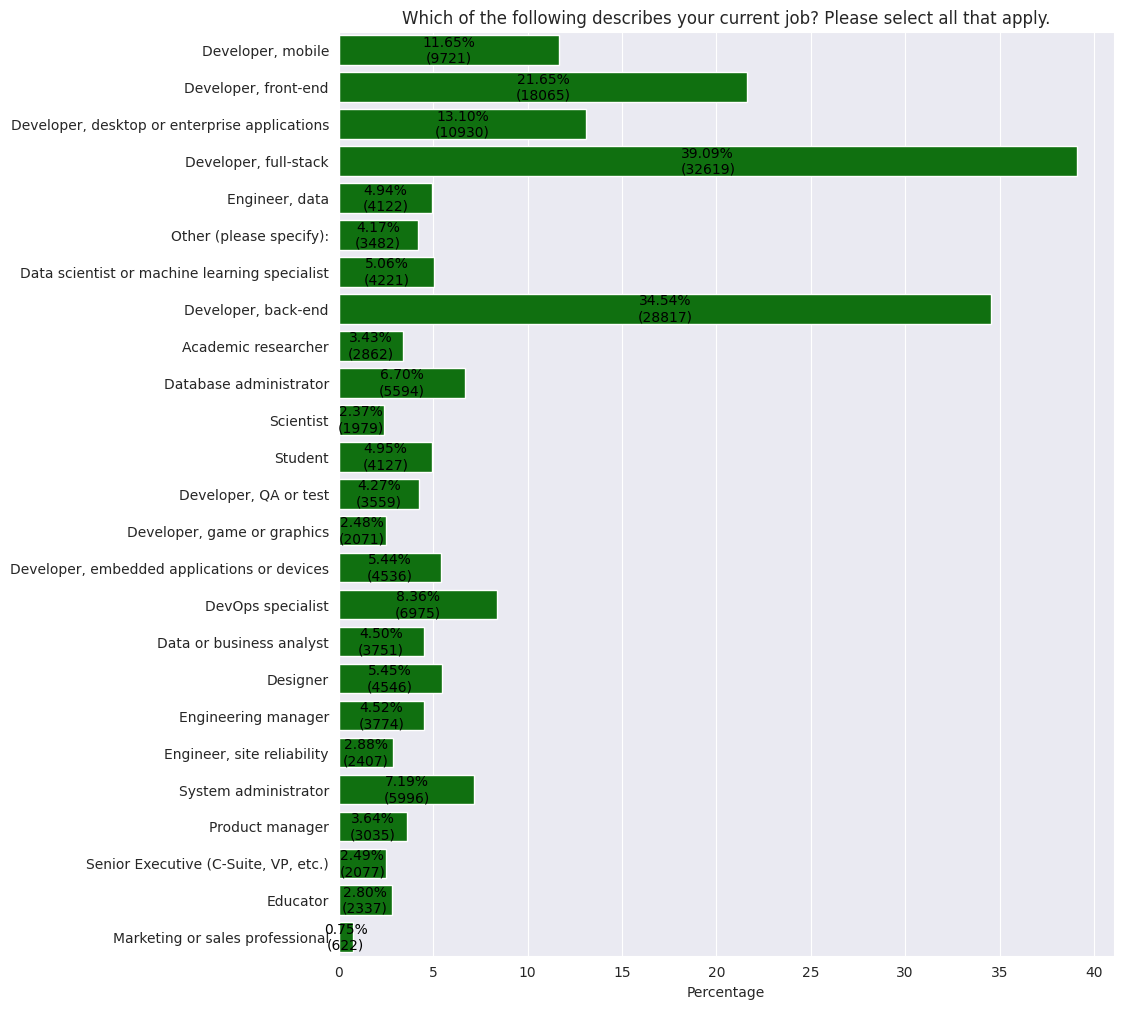

In [105]:
#  i)what percentage of respondents work in roles related to data science?
role_percentages = (merged_df[['Developer, mobile', 'Developer, front-end',
       'Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Engineer, data', 'Other (please specify):',
       'Data scientist or machine learning specialist', 'Developer, back-end',
       'Academic researcher', 'Database administrator', 'Scientist', 'Student',
       'Developer, QA or test', 'Developer, game or graphics',
       'Developer, embedded applications or devices', 'DevOps specialist',
       'Data or business analyst', 'Designer', 'Engineering manager',
       'Engineer, site reliability', 'System administrator', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'Educator',
       'Marketing or sales professional']].sum() / len(merged_df)) * 100


plt.figure(figsize=(10, 12))
ax = sns.barplot(x=role_percentages, y=role_percentages.index, color='green')

for p, percentage, count in zip(ax.patches, role_percentages, merged_df[['Developer, mobile', 'Developer, front-end',
       'Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Engineer, data', 'Other (please specify):',
       'Data scientist or machine learning specialist', 'Developer, back-end',
       'Academic researcher', 'Database administrator', 'Scientist', 'Student',
       'Developer, QA or test', 'Developer, game or graphics',
       'Developer, embedded applications or devices', 'DevOps specialist',
       'Data or business analyst', 'Designer', 'Engineering manager',
       'Engineer, site reliability', 'System administrator', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'Educator',
       'Marketing or sales professional']].sum()):
    # Add percentage and count annotations in the middle of the bars
    ax.text(p.get_width() / 2, p.get_y() + p.get_height() / 2,
            f'{percentage:.2f}%\n({count})',
            ha='center', va='center', color='black', fontsize=10)

plt.title(schema_df['DevType'])
plt.xlabel('Percentage')
plt.show()


Most of the employees are Developers from fullstack, backend, frontend etc which comprises more than 50% of the different roles. Data science roles are around only 5%.

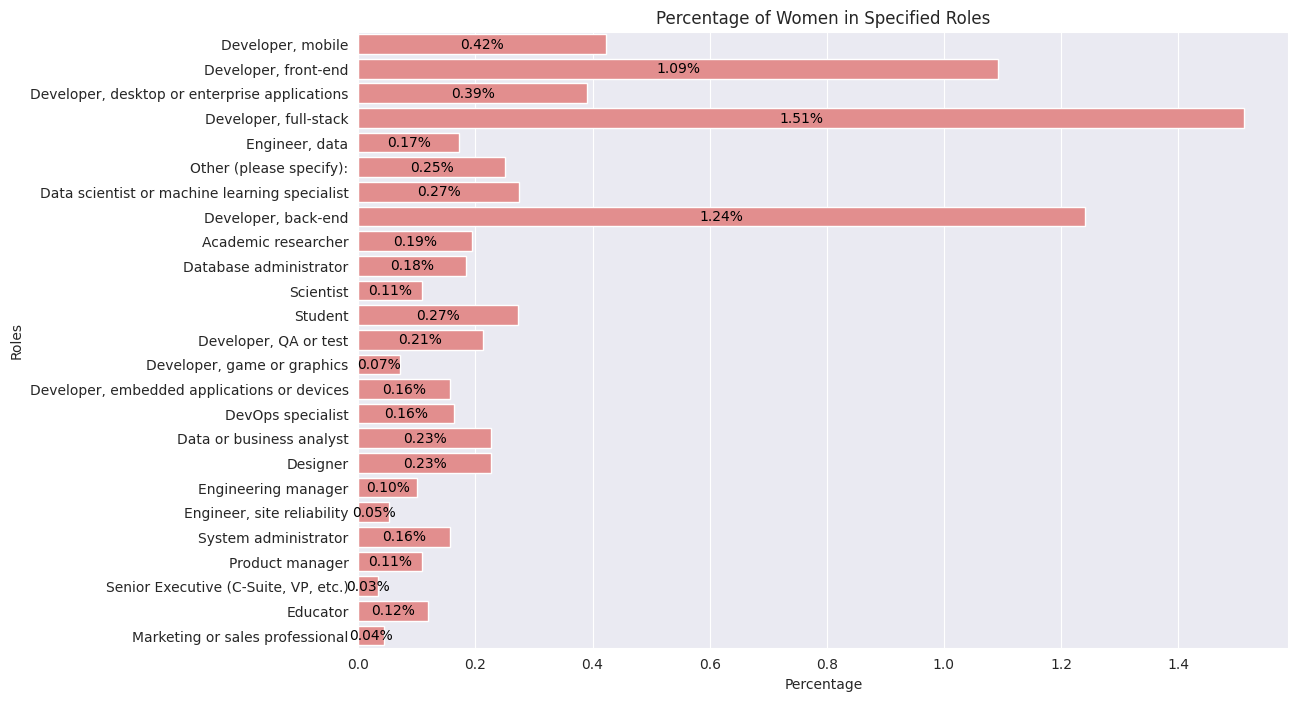

In [113]:
# Select columns related to the specified roles
selected_roles = ['Developer, mobile', 'Developer, front-end',
                  'Developer, desktop or enterprise applications',
                  'Developer, full-stack', 'Engineer, data', 'Other (please specify):',
                  'Data scientist or machine learning specialist', 'Developer, back-end',
                  'Academic researcher', 'Database administrator', 'Scientist', 'Student',
                  'Developer, QA or test', 'Developer, game or graphics',
                  'Developer, embedded applications or devices', 'DevOps specialist',
                  'Data or business analyst', 'Designer', 'Engineering manager',
                  'Engineer, site reliability', 'System administrator', 'Product manager',
                  'Senior Executive (C-Suite, VP, etc.)', 'Educator',
                  'Marketing or sales professional']

# Calculate the percentage of women for each specified role
role_percentages_women = {}

for role in selected_roles:
    # Count the occurrences of 'Woman' in the 'Gender' column for each role
    women_count = (merged_df['Gender'] == 'Woman') & (merged_df[role] == True)

    # Calculate the percentage of women for each role
    percentage_women = women_count.sum() / len(merged_df) * 100

    # Store the result in the dictionary
    role_percentages_women[role] = percentage_women


plt.figure(figsize=(12, 8))
ax = sns.barplot(x=list(role_percentages_women.values()), y=list(role_percentages_women.keys()), color='lightcoral')

# Display percentage of women on the bars
for p, percentage in zip(ax.patches, role_percentages_women.values()):
    # Add percentage annotations on the bars
    ax.text(p.get_width() / 2, p.get_y() + p.get_height() / 2,
            f'{percentage:.2f}%',
            ha='center', va='center', color='black', fontsize=10)

plt.title('Percentage of Women in Specified Roles')
plt.xlabel('Percentage')
plt.ylabel('Roles')
plt.show()


The highest percentage of women work in Front-end, Back-end, Fullstack sectors

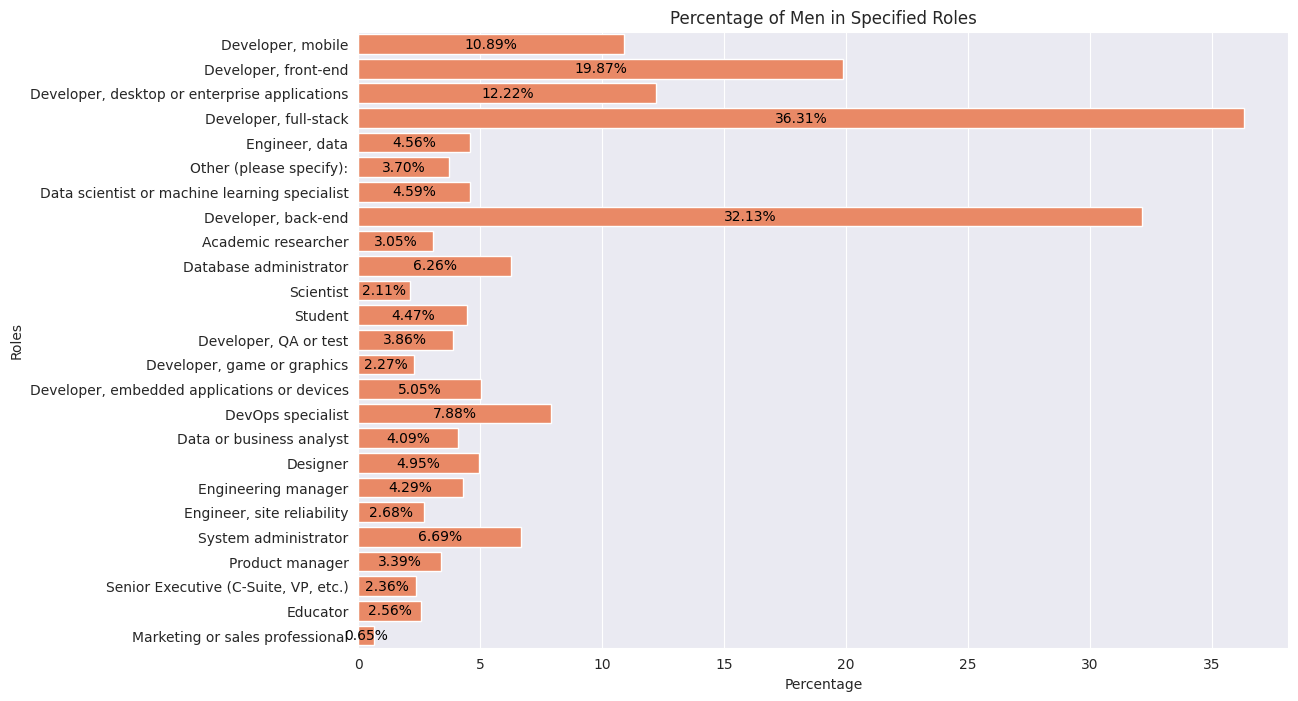

In [118]:
# Select columns related to the specified roles
selected_roles = ['Developer, mobile', 'Developer, front-end',
                  'Developer, desktop or enterprise applications',
                  'Developer, full-stack', 'Engineer, data', 'Other (please specify):',
                  'Data scientist or machine learning specialist', 'Developer, back-end',
                  'Academic researcher', 'Database administrator', 'Scientist', 'Student',
                  'Developer, QA or test', 'Developer, game or graphics',
                  'Developer, embedded applications or devices', 'DevOps specialist',
                  'Data or business analyst', 'Designer', 'Engineering manager',
                  'Engineer, site reliability', 'System administrator', 'Product manager',
                  'Senior Executive (C-Suite, VP, etc.)', 'Educator',
                  'Marketing or sales professional']

# Calculate the percentage of women for each specified role
role_percentages_men = {}

for role in selected_roles:
    # Count the occurrences of 'Woman' in the 'Gender' column for each role
    men_count = (merged_df['Gender'] == 'Man') & (merged_df[role] == True)

    # Calculate the percentage of women for each role
    percentage_men = men_count.sum() / len(merged_df) * 100

    # Store the result in the dictionary
    role_percentages_men[role] = percentage_men


plt.figure(figsize=(12, 8))
ax = sns.barplot(x=list(role_percentages_men.values()), y=list(role_percentages_men.keys()), color='Coral')

# Display percentage of women on the bars
for p, percentage in zip(ax.patches, role_percentages_men.values()):
    # Add percentage annotations on the bars
    ax.text(p.get_width() / 2, p.get_y() + p.get_height() / 2,
            f'{percentage:.2f}%',
            ha='center', va='center', color='black', fontsize=10)

plt.title('Percentage of Men in Specified Roles')
plt.xlabel('Percentage')
plt.ylabel('Roles')
plt.show()


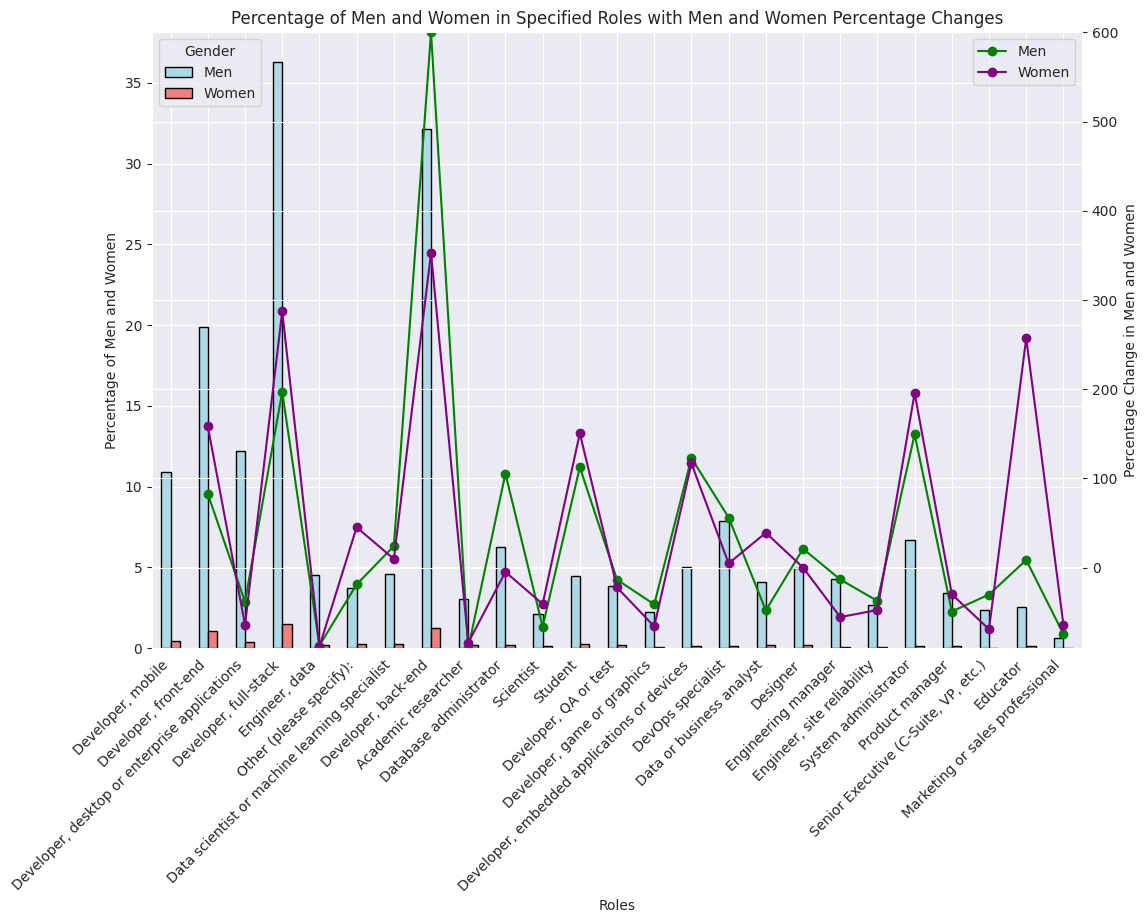

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'merged_df' contains the merged data with the specified columns
# Assuming 'Gender' column contains values like 'Woman' and 'Man'

# Select columns related to the specified roles
selected_roles = ['Developer, mobile', 'Developer, front-end',
                  'Developer, desktop or enterprise applications',
                  'Developer, full-stack', 'Engineer, data', 'Other (please specify):',
                  'Data scientist or machine learning specialist', 'Developer, back-end',
                  'Academic researcher', 'Database administrator', 'Scientist', 'Student',
                  'Developer, QA or test', 'Developer, game or graphics',
                  'Developer, embedded applications or devices', 'DevOps specialist',
                  'Data or business analyst', 'Designer', 'Engineering manager',
                  'Engineer, site reliability', 'System administrator', 'Product manager',
                  'Senior Executive (C-Suite, VP, etc.)', 'Educator',
                  'Marketing or sales professional']

# Calculate the percentage of men and women for each specified role
role_percentages = {}

for role in selected_roles:
    # Count the occurrences of 'Man' and 'Woman' in the 'Gender' column for each role
    men_count = (merged_df['Gender'] == 'Man') & (merged_df[role] == True)
    women_count = (merged_df['Gender'] == 'Woman') & (merged_df[role] == True)

    # Calculate the percentage of men and women for each role
    percentage_men = men_count.sum() / len(merged_df) * 100
    percentage_women = women_count.sum() / len(merged_df) * 100

    # Store the results in the dictionary
    role_percentages[role] = {'Men': percentage_men, 'Women': percentage_women}

# Convert the results to a DataFrame for easier plotting
role_percentages_df = pd.DataFrame(role_percentages).T

# Plotting with zigzag line
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for men and women
ax2 = ax1.twinx()
role_percentages_df.plot(kind='bar', color=['lightblue', 'lightcoral'], edgecolor='black', ax=ax1)

# Add zigzag line around the bars
for container in ax1.containers:
    for i, patch in enumerate(container.patches):
        if i % 2 == 1:
            patch.set_edgecolor('black')

# Line plot for men and women percentage changes
men_percentage_changes = role_percentages_df['Men'].pct_change() * 100
women_percentage_changes = role_percentages_df['Women'].pct_change() * 100
ax2.plot(men_percentage_changes.index, men_percentage_changes, marker='o', color='green', label='Men')
ax2.plot(women_percentage_changes.index, women_percentage_changes, marker='o', color='purple', label='Women')

# Manually set the y-axis limits for the secondary axis
ax2.set_ylim(bottom=men_percentage_changes.min(), top=men_percentage_changes.max())

# Add labels and title
ax1.set_title('Percentage of Men and Women in Specified Roles with Men and Women Percentage Changes')
ax1.set_xlabel('Roles')
ax1.set_ylabel('Percentage of Men and Women')
ax2.set_ylabel('Percentage Change in Men and Women')

# Display the legend
ax1.legend(title='Gender', loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.show()

##Asking and Answering Questions